In [63]:
#Imports

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
import shutil
import tensorflow as tf

from assign4_lib.object_detection import *

In [64]:
#Constants

MODEL_PATH = "/home/jovyan/work/models/darknet"
IMG_SIZE = 256
CONFIDENCE_THRESHOLD=0.3

Below is a simple demonstration of the object detector.

We first load the DarkNet model using saved weights and configuration.

In [21]:
#Darknet config with CUDA
net = cv2.dnn.readNet(f"{MODEL_PATH}/yolov4-dolphin_best.weights", f"{MODEL_PATH}/yolov4-dolphin.cfg")
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

In [65]:
model = cv2.dnn_DetectionModel(net)
model.setInputParams(size = (IMG_SIZE, IMG_SIZE), scale = 1/255, swapRB = True, crop = False)

We will use a clean, pre-processed image for demonstration purposes.

In [66]:
test_image = "../images/final_pigmentation_catalogue_2016/0002/HG_090329_0030_NB.png"

Below, we compare pre-processed and processed images. The image has been rescaled, normalised, and denoised using bilaterial filtering.

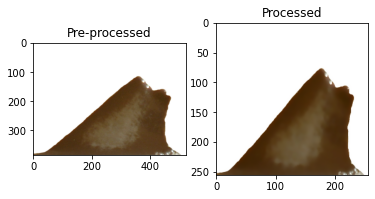

In [98]:
preprocess_image(test_image, IMG_SIZE)

The DarkNet model will predict the object type. A bounding box has been provided for visualisation purposes.

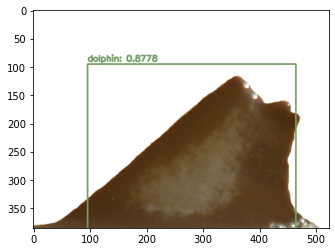

In [100]:
draw_bounding_box(net, IMG_SIZE, CONFIDENCE_THRESHOLD, test_image, False)

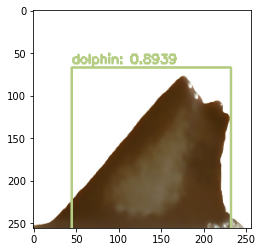

In [101]:
draw_bounding_box(net, IMG_SIZE, CONFIDENCE_THRESHOLD, test_image, True)

Finally, we can use these bounding boxes to crop images automatically.

(67, 265, 45, 232)

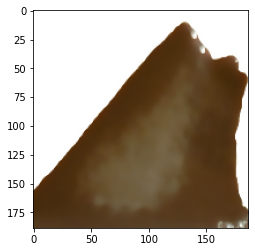

In [130]:
crop_image(net, IMG_SIZE, CONFIDENCE_THRESHOLD, test_image, True)